In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon.csv')

In [ ]:
# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Drop unnecessary columns based on project plan
columns_to_keep = ['product_id', 'product_name', 'category','discounted_price','actual_price', 'rating', 'rating_count', 'about_product',
                   'user_id', 'review_id', 'review_title', 'review_content']
df = df[columns_to_keep]

In [ ]:
# Handle missing values
df.dropna(subset=['review_content', 'rating'], inplace=True)

In [ ]:
# Add review length column
df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))


In [ ]:
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = ["product", "like","good","easy","use"]  # Add your specific words
stop_words.update(custom_stopwords)  # Update stopwords set

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply preprocessing
df['cleaned_review'] = df['review_content'].astype(str).apply(preprocess_text)

In [ ]:
reviews = df['cleaned_review']

vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, max_features=5000, stop_words='english')
X = vectorizer.fit_transform(reviews)

# Get the terms (words) and their corresponding term frequencies (TF)
terms = vectorizer.get_feature_names_out()
term_frequencies = X.sum(axis=0).A1  # Sum across all documents

frequency_df = pd.DataFrame(list(zip(terms, term_frequencies)), columns=['Word', 'Frequency'])
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most frequent words
print(frequency_df.head(10))

          Word  Frequency
2519   quality  70.256776
397      cable  67.148906
486   charging  51.103816
2387     price  46.262668
3589   working  37.917501
2267     phone  37.902488
3433     using  36.223175
242    battery  34.270183
3346        tv  32.496618
384        buy  32.475281


In [ ]:
# Initialize Sentiment Analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def get_sentiment(text):
    """Classifies sentiment as Positive, Neutral, or Negative."""
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 1
    elif score < -0.05:
        return -1
    else:
        return 0

In [ ]:
# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

In [ ]:
df['cleaned_review'].head(5)

,cleaned_review
0,looks durable charging fine toono complainscha...
1,ordered cable connect phone android auto car c...
2,quite durable sturdyhttpsmmediaamazoncomimages...
3,productlong wirecharges goodnicei bought cable...
4,bought instead original apple work rs fast app...


In [ ]:
# Define a mapping dictionary
sentiment_mapping = {1: "Positive", 0: "Neutral", -1: "Negative"}

# Create a new column with mapped sentiment labels
df["sentiment_label_text"] = df["sentiment"].map(sentiment_mapping)

# Display the first few rows
print(df[["sentiment", "sentiment_label_text"]].head())


   sentiment sentiment_label_text
0          1             Positive
1          1             Positive
2          1             Positive
3          1             Positive
4          1             Positive


<ipython-input-16-429a348e9b1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label_text', data=df, palette='coolwarm')


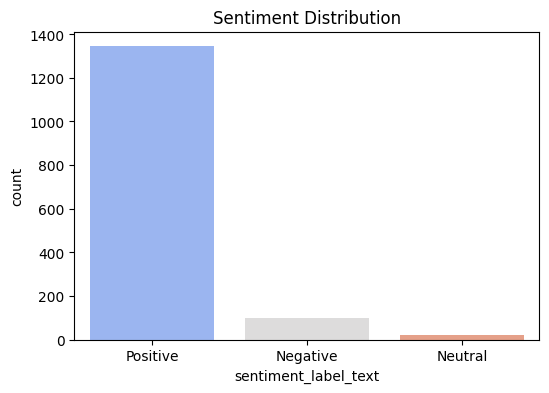

In [ ]:
# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label_text', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-17-e8e97dc8f151>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label_text', y='review_length', data=df, palette='coolwarm')


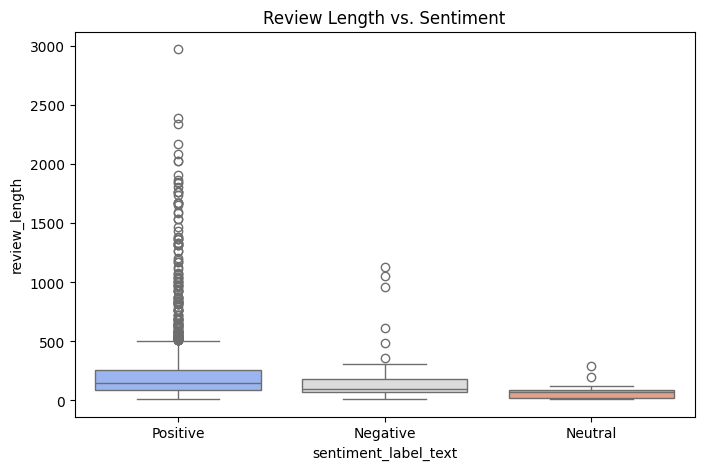

In [ ]:
# Review Length vs. Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment_label_text', y='review_length', data=df, palette='coolwarm')
plt.title('Review Length vs. Sentiment')
plt.show()

In [ ]:
# Regression Analysis: Review Length vs. Rating
X = df[['review_length']]
# Convert 'rating' to numeric, handling errors, and then drop NaNs
y = pd.to_numeric(df['rating'], errors='coerce').dropna()
# Filter the DataFrame based on the valid ratings in 'y'
df = df[df.index.isin(y.index)]
X = df[['review_length']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
# Regression Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.07705379430653071
R-squared Score: 0.00699365804788743


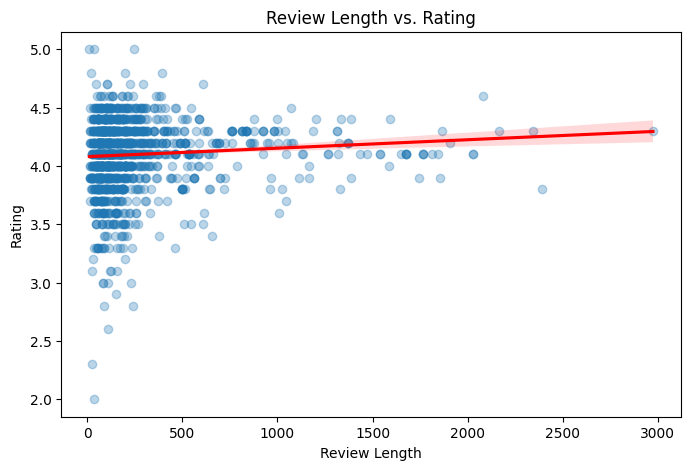

In [ ]:
# Plot Regression
plt.figure(figsize=(8,5))
# Ensure 'rating' is numeric before plotting
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])  # Drop rows with invalid ratings
sns.regplot(x=df['review_length'], y=df['rating'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

<ipython-input-21-a6a95ed3e448>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label_text', y='rating', data=df, palette='coolwarm')


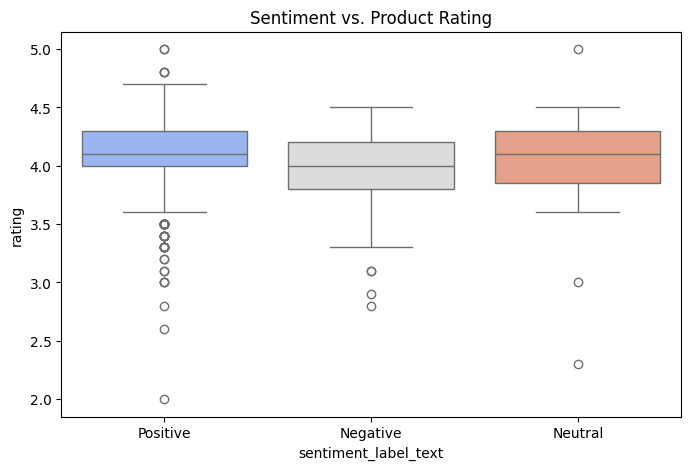

In [ ]:
# Sentiment vs. Product Rating
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment_label_text', y='rating', data=df, palette='coolwarm')
plt.title('Sentiment vs. Product Rating')
plt.show()

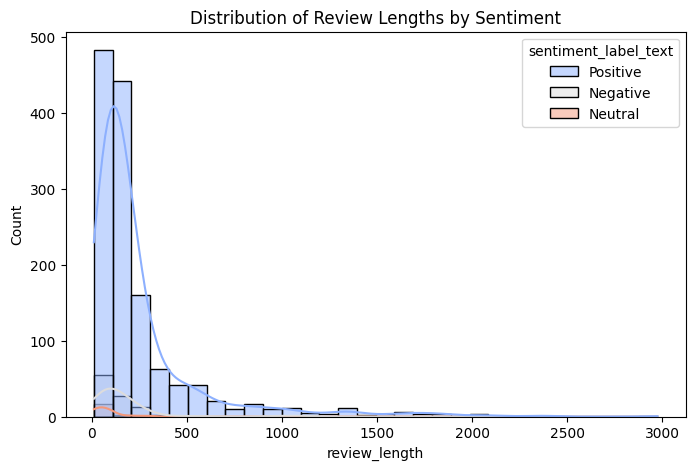

In [ ]:
# Distribution of Review Lengths by Sentiment
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='review_length', hue='sentiment_label_text', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()

In [ ]:
correlation = df["review_length"].corr(df["rating"])
print(f"Correlation between review length and rating: {correlation:.4f}")

Correlation between review length and rating: 0.0787


In [ ]:
correlation = df["review_length"].corr(df["sentiment"])
print(f"Correlation between review length and sentiment: {correlation:.4f}")

Correlation between review length and sentiment: 0.0835


In [ ]:
#Top 5 categories that has the most review
top_categories = df['category'].value_counts().head(5)

# Display the top 5 categories with the most reviews
print(top_categories)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64


<ipython-input-26-fb66614c4605>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


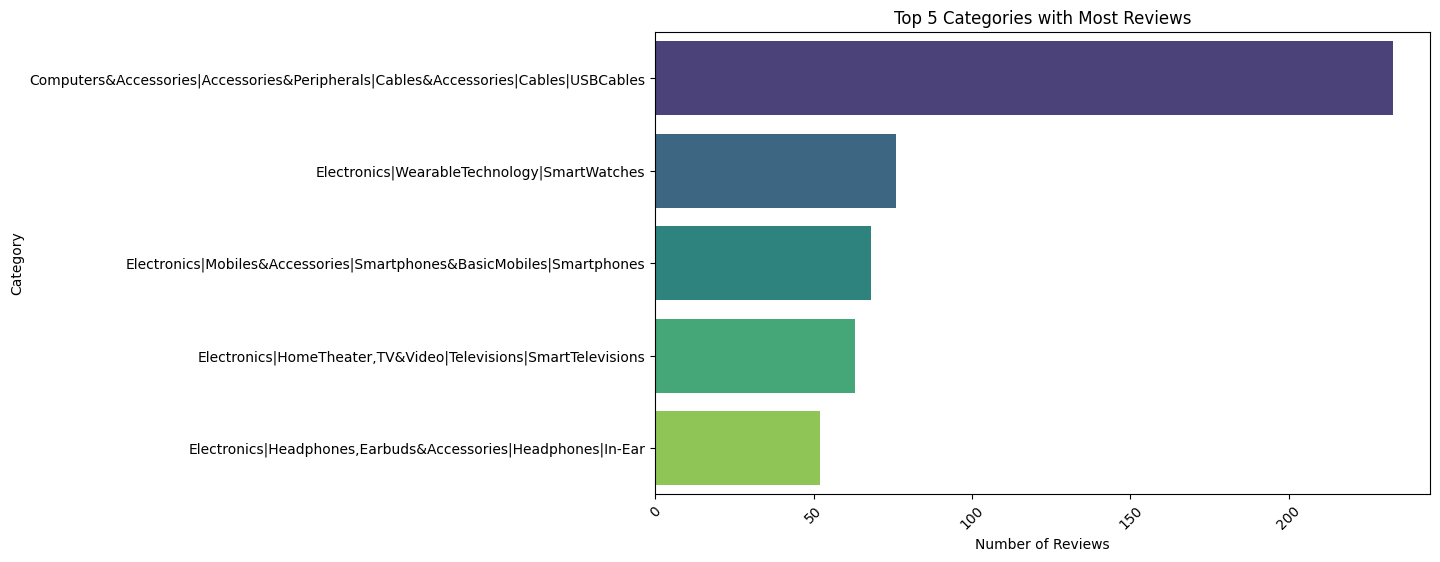

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")

# Add labels and title
plt.xlabel("Number of Reviews")
plt.ylabel("Category")
plt.title("Top 5 Categories with Most Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df["cleaned_review"].isnull().sum())
print(df["cleaned_review"].str.len().sum())

print(df["sentiment"].value_counts())

0
1301289
sentiment
 1    1344
-1     101
 0      19
Name: count, dtype: int64


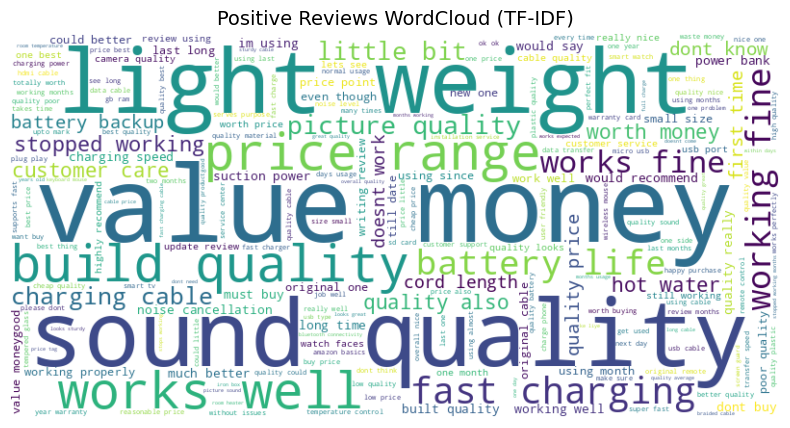

In [ ]:
# Filter positive reviews
positive_reviews = df["cleaned_review"].dropna().astype(str)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, max_features=5000,ngram_range=(2,3))

# Fit and transform the positive reviews
tfidf_matrix = vectorizer.fit_transform(positive_reviews)

# Get feature names (words) and their corresponding TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum TF-IDF scores for each word

# Create dictionary of words and their TF-IDF scores
word_scores = dict(zip(feature_names, tfidf_scores))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_scores)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews WordCloud (TF-IDF)", fontsize=14)
plt.show()

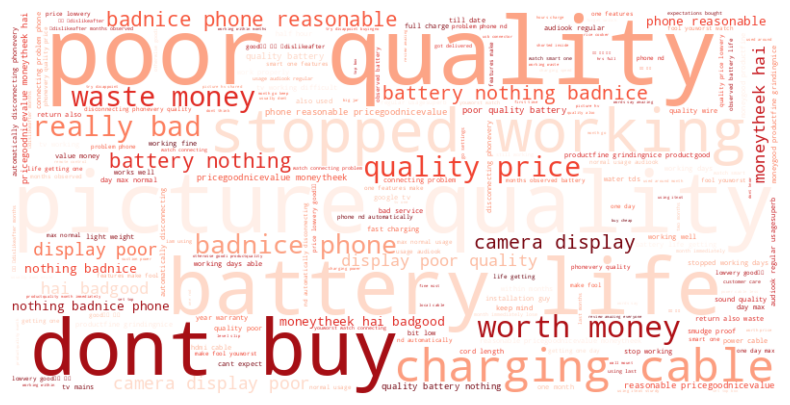

In [ ]:
# Filter negative reviews
negative_reviews = df[df['sentiment'] == -1]['cleaned_review']

# Vectorize the negative reviews using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(2, 3))
X = vectorizer.fit_transform(negative_reviews)

# Get the feature names (words/phrases)
feature_names = vectorizer.get_feature_names_out()

# Get the tf-idf scores for each feature (word/phrase)
tfidf_scores = X.sum(axis=0).A1  # Summing scores across all reviews for each feature

# Create a dictionary of words and their corresponding scores
word_scores = dict(zip(feature_names, tfidf_scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="Reds").generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)  # Model now gives equal importance to all classes

# Predict sentiment
y_pred = model.predict(X_test)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


sentiment
 1    944
-1     69
 0     11
Name: count, dtype: int64
sentiment
 1    400
-1     32
 0      8
Name: count, dtype: int64
Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.16      0.26        32
           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96       400

    accuracy                           0.92       440
   macro avg       0.58      0.39      0.41       440
weighted avg       0.90      0.92      0.89       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, max_features=5000, ngram_range=(3,4))

X = vectorizer.fit_transform(df['cleaned_review'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()
print("Top 10 Features:", feature_names[:10])


Top 10 Features: ['accessory travelling without' 'accessory travelling without risking'
 'accuracy feel little' 'accuracy feel little bit' 'accurate near trust'
 'accurate near trust emergency' 'accurate sensors efficiently'
 'accurate sensors efficiently worked' 'accurate sensorsbad ui'
 'accurate sensorsbad ui fonts']


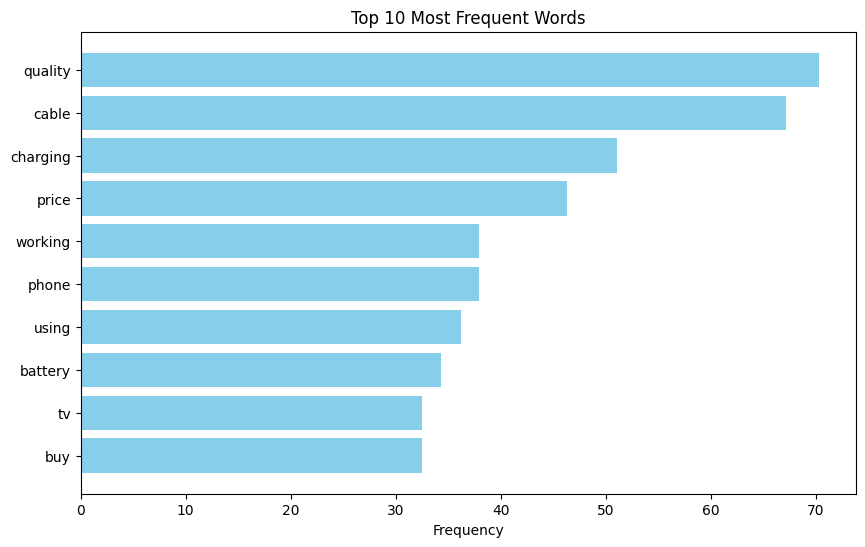

In [ ]:
# Plot the top 10 frequent words
top_10_words = frequency_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_words['Word'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Use SMOTE to handle the class imbalance
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Convert text data into numerical features (e.g., TF-IDF)
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adjust SMOTE to handle small classes
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=min(3, len(y_train.unique()) - 1))

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class balance
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_train).value_counts())

sentiment
 1    944
-1    944
 0    944
Name: count, dtype: int64
sentiment
 1    944
-1     69
 0     11
Name: count, dtype: int64


In [ ]:
# Machine learning models accuracy after fixing the class imbalance on the train test
# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict sentiment
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.16      0.27        32
           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96       400

    accuracy                           0.92       440
   macro avg       0.64      0.39      0.41       440
weighted avg       0.91      0.92      0.89       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict sentiment
y_pred_rf_1 = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf_1)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf_1))

Model Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.06      0.12        32
           0       0.00      0.00      0.00         8
           1       0.91      1.00      0.95       400

    accuracy                           0.91       440
   macro avg       0.64      0.35      0.36       440
weighted avg       0.90      0.91      0.88       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Model Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.16      0.27        32
           0       0.00      0.00      0.00         8
           1       0.92      1.00      0.96       400

    accuracy                           0.92       440
   macro avg       0.64      0.39      0.41       440
weighted avg       0.91      0.92      0.89       440



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Topic Modeling on Negative Reviews
#LDA to find topics in negative reviews
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000, stop_words='english', ngram_range=(2,3))
X = vectorizer.fit_transform(df[df['sentiment'] == -1]['cleaned_review'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Print topics
for index, topic in enumerate(lda_model.components_):
    words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {index+1}: {', '.join(words)}")


Topic 1: stopped working, value money, till date, dont buy, charging cable, buy cheap, vacuum mop, worth money, suction power, battery life
Topic 2: wall hanging hook, addresswhy bad badthey, floor mount, badthey come support, ok smart, buy floor mount, quality poor, bad service, google tv, installation guy
Topic 3: goodgreat really durablegood, headphone jack, problem earphone jack, able hear, customer care, got delivered, need frequently, quality bad, using months, cord length
Topic 4: poor quality, smudge proof, switch socket, click time, gas stove, change temperature, picture quality, set minutes, fast charging, charging cable
Topic 5: worth price, local cable, iam using, worth money, year warranty, remote control, sound quality, quality price, tv mains, picture quality
